In [1]:
!pip install -q pandas

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip install -q sklearn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install -q openpyxl

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
np.set_printoptions(precision=3, suppress=True)

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.0


In [7]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_absolute_error

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
def build_and_compile_model(normalizer):
  model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [10]:
def plot_loss(history, var_name):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel(f'Error [{var_name}]')
  plt.legend()
  plt.grid(True)

In [11]:
val_data = pd.read_excel("validation905.xlsx",na_values="NaN",  engine='openpyxl')

In [12]:
val_data.head()

,datetime,Year,Time,Month,Day,Week,GHI,TEMP,PH,EC,TURB,SA DO,SA NO3,SA NH4,SA PO4
0,2021-01-04 19:00:00,2021,19:00:00,1,4,1,2.386,7.3,8.39,679,51,11.7,12.5,0.13,0.16
1,2021-01-04 19:15:00,2021,19:15:00,1,4,1,2.138,7.3,8.38,680,54,11.7,12.5,0.13,0.16
2,2021-01-04 19:30:00,2021,19:30:00,1,4,1,2.026,7.3,8.38,681,56,11.7,12.5,0.13,0.16
3,2021-01-04 19:45:00,2021,19:45:00,1,4,1,2.149,7.3,8.38,681,58,11.7,12.6,0.13,0.16
4,2021-01-04 20:00:00,2021,20:00:00,1,4,1,2.370,7.3,8.38,680,58,11.7,12.5,0.14,0.16


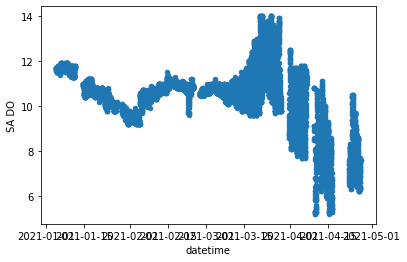

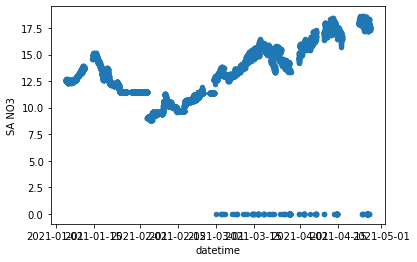

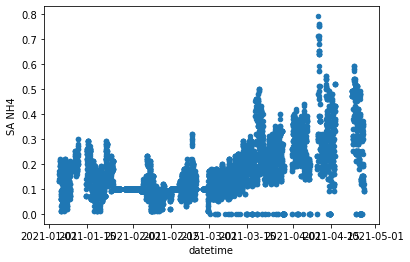

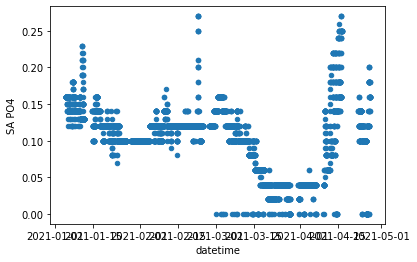

In [13]:
for val in ['SA DO', 'SA NO3', 'SA NH4', 'SA PO4']:
    val_data.plot(x='datetime', y=val, kind='scatter')

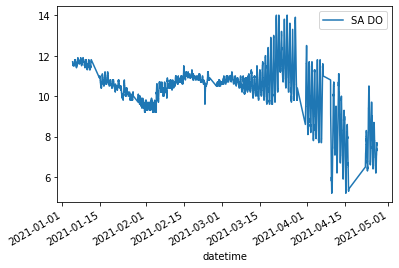

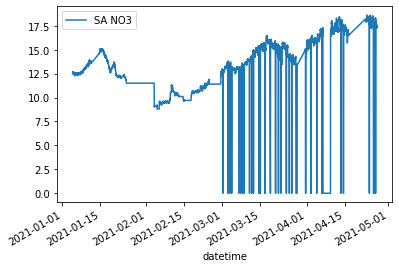

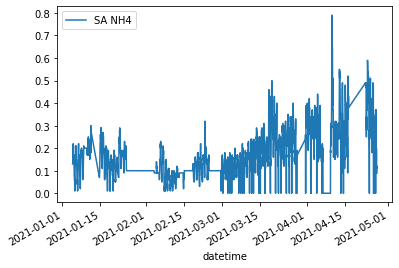

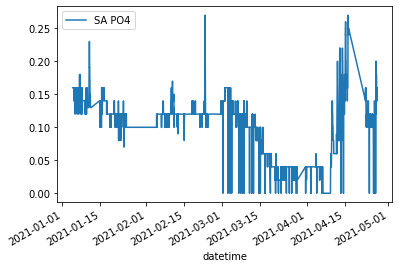

In [14]:
for val in ['SA DO', 'SA NO3', 'SA NH4', 'SA PO4']:
    val_data.plot(x='datetime', y=val)

In [4]:
ls dnn*

dnn_predicted_do.csv   dnn_predicted_no3.csv
dnn_predicted_nh4.csv  dnn_predicted_po4.csv


In [5]:
import sys

In [6]:
import glob

In [7]:
import os

In [9]:
glob.glob('dnn*')

['dnn_predicted_do.csv',
 'dnn_predicted_po4.csv',
 'dnn_predicted_nh4.csv',
 'dnn_predicted_no3.csv']